# Task1/Point2

## 2. PCA. Use the data in Table 1 to calculate PCA and reduce the dimensionality of 2 dimensions to 1. For this exercise you must use the variables X1 and X2 and create a vector with a single dimension.

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("data/DEPARTMENTS.csv")
df

,Department,PIB millions,Population,PIB per capita millions
0,Amazonas,1.067856e+06,76589,13.942677
1,Antioquia,2.125150e+08,6407102,33.168655
2,Arauca,8.548115e+06,262174,32.604738
3,Atlántico,6.376477e+07,2535517,25.148627
4,Bogotá D.C.,3.572586e+08,7412566,48.196349
5,Bolívar,5.140435e+07,2070110,24.831701
6,Boyacá,3.885816e+07,1217376,31.919606
7,Caldas,2.395311e+07,998255,23.994984
8,Caquetá,5.461367e+06,401849,13.590594
9,Casanare,2.366066e+07,420504,56.267378


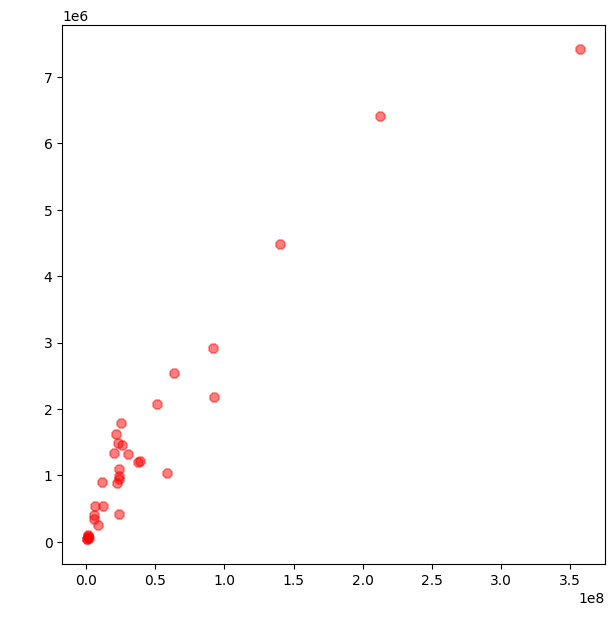

In [44]:
column1 = df['PIB millions']
column2 = df['Population']

figura = plt.figure(figsize = (7, 7))
plt.scatter(column1, column2, marker = "8", s = 50, color = "red", alpha = 0.5)
plt.xlabel("PIB millions", fontsize = 20, color = "white")
plt.ylabel("Population", fontsize = 20, color = "white")
plt.show()

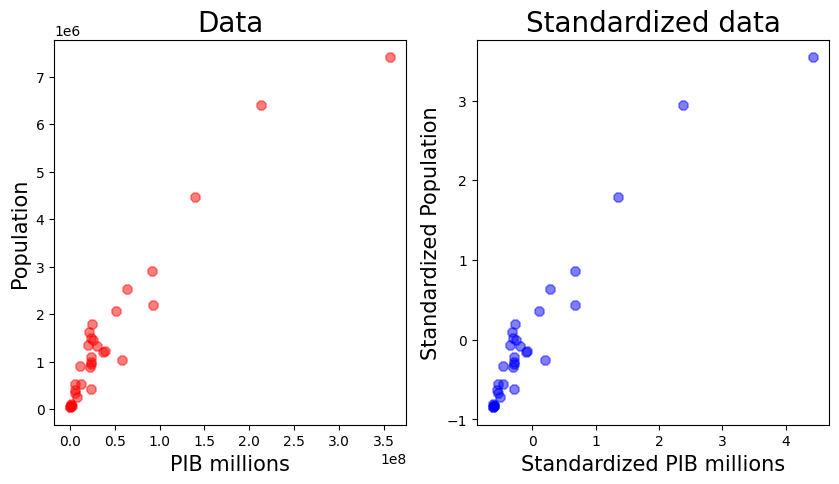

In [45]:
from sklearn.preprocessing import StandardScaler

fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.set_title("Data", fontsize=20)
ax1.scatter(column1, column2, marker="8", s=50, color="red", alpha=0.5)
ax1.set_xlabel("PIB millions", fontsize=15)
ax1.set_ylabel("Population", fontsize=15)

columns = ["PIB millions", "Population"]
data = df[columns]
dataScaled = pd.DataFrame(StandardScaler().fit_transform(data), columns=columns)

ax2.set_title("Standardized data", fontsize=20)
ax2.scatter(dataScaled["PIB millions"], dataScaled["Population"], marker="8", s=50, color="blue", alpha=0.5)
ax2.set_xlabel("Standardized PIB millions", fontsize=15)
ax2.set_ylabel("Standardized Population", fontsize=15)

plt.show()

### 2.1 What is the covariance matrix?

In [46]:
covariance = dataScaled.cov()
covariance

,PIB millions,Population
PIB millions,1.031250,0.985102
Population,0.985102,1.031250


### 2.2 What are the eigenvalues?

In [47]:
values, vectors = np.linalg.eig(covariance)

print(f"Eigenvalues { values }")
print(f"Eigenvectors { vectors }")

Eigenvalues [0.04614815 2.01635185]
Eigenvectors [[-0.70710678 -0.70710678]
 [ 0.70710678 -0.70710678]]


### 2.3 What is the variance explained by the eigenvalue?

In [48]:
totalVariance = np.sum(values)

explainedVarianceRatio = (values / totalVariance) * 100

for i, ev in enumerate(explainedVarianceRatio):
    print(f"Eigenvalue {i+1}: Explained variance = {ev:.2f}%")

Eigenvalue 1: Explained variance = 2.24%
Eigenvalue 2: Explained variance = 97.76%


### 2.4 What is the value of the eigenvector?

In [49]:
redVecotor = vectors[0]
blueVector = vectors[1]

print("Red vector:", redVecotor)
print("Blue vector:", blueVector)

Red vector: [-0.70710678 -0.70710678]
Blue vector: [ 0.70710678 -0.70710678]


### 2.5 What is the projected matrix?

In [50]:
originalMatrix = np.array([[1, 2], [3, 4]])
projectedMatrix = np.dot(originalMatrix, vectors.T)
print(projectedMatrix)

[[-2.12132034 -0.70710678]
 [-4.94974747 -0.70710678]]


### 2.6 What is the error or difference between the projected matrix?

In [51]:
errorMatrix = originalMatrix - np.dot(projectedMatrix, vectors)
errorMatrix

array([[1.11022302e-16, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00]])